# Implementing Ollivier-Ricci Curvature with Diffusion EMD

In [24]:
%load_ext autoreload
%autoreload 2
import numpy as np
from DiffusionEMD import DiffusionCheb
from pecan import data
import matplotlib.pyplot as plt
import graphtools
from DiffusionEMD.estimate_utils import l1_distance_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Build the torus and create a graph, along with the accompanying diffusion operator.

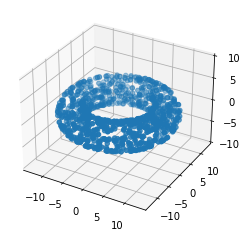

In [2]:
X = data.torus(1000,inner_radius=3,outer_radius=10) # make a 500 point torus
# visualize
fig = plt.figure()
ax = plt.subplot(projection='3d')
ax.set_zlim(-10,10)
ax.scatter(X[:,0],X[:,1],X[:,2])

In [5]:
G = graphtools.graphs.kNNGraph(X)

In [22]:
P = G.P.toarray()
P_symmetric = G.diff_aff.toarray()
A = G.K.toarray() - np.eye(len(P))

In [53]:
P.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Create two distributions on the torus.

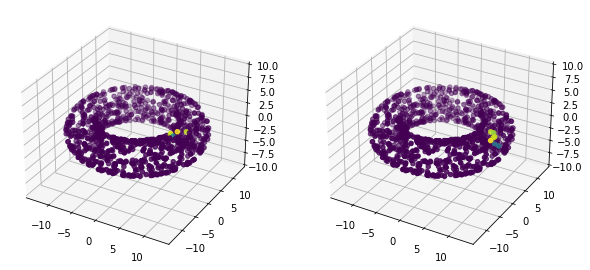

In [19]:
distributions = np.zeros((len(A),2))
distributions[:,0][40] = 1
distributions[:,1][55] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

Find DEMD between distributions

In [23]:
demd = DiffusionCheb() # a form of the DEMD that uses chebyshev polynomial approximations to eigendecompose P
embeddings = demd.fit_transform(A,distributions)

In [33]:
embeddings

array([[-3.60776450e-07, -1.96412889e-04,  1.53944111e-04, ...,
         7.93634213e-04,  1.56819618e-04,  1.88838630e-04],
       [-1.64984469e-07, -1.55438016e-04, -1.26792206e-04, ...,
         7.87114268e-04,  1.82075537e-04,  2.19404406e-04]])

In [25]:
l1_distance_matrix(embeddings)

array([[0.        , 0.38395092],
       [0.38395092, 0.        ]])

In [26]:
a = np.array([1,2,3,4,5])
b = np.ones(5)
np.linalg.norm(a-b, ord=1)

10.0

In [27]:
x = np.random.rand(5,5)

In [28]:
x

array([[0.24583895, 0.40066667, 0.13616823, 0.91474911, 0.73956551],
       [0.13570132, 0.42159565, 0.26881539, 0.35076733, 0.62606411],
       [0.24559037, 0.16321634, 0.77211055, 0.79732566, 0.58748132],
       [0.8659839 , 0.37151288, 0.01801789, 0.87622525, 0.80306225],
       [0.28069905, 0.05954707, 0.11861443, 0.69548264, 0.36754597]])

In [31]:
a

array([1, 2, 3, 4, 5])

In [32]:
x * a

array([[0.24583895, 0.80133334, 0.40850469, 3.65899643, 3.69782753],
       [0.13570132, 0.8431913 , 0.80644617, 1.40306934, 3.13032054],
       [0.24559037, 0.32643267, 2.31633166, 3.18930265, 2.93740661],
       [0.8659839 , 0.74302577, 0.05405368, 3.50490099, 4.01531126],
       [0.28069905, 0.11909414, 0.3558433 , 2.78193057, 1.83772984]])

# Testing Ollivier-Ricci-DEMD curvature on the donut

In [110]:
from pecan.curvature import Ollivier_Ricci_Curvature_DEMD
ORC = Ollivier_Ricci_Curvature_DEMD(G,lp=2) # initialize with a graphtools graph of the torus

Test curvature between various points on the torus

In [40]:
i = 1
j = 5
k = ORC.curvature_between(i,j)
k

0.8029100636411202

In [40]:
i = 1
j = 5
k = ORC.curvature_between(i,j)
k

0.8029100636411202

With nice visualizations

DEMD is 1.3518012679023945
Diffusion distance is 0.5470171667930013


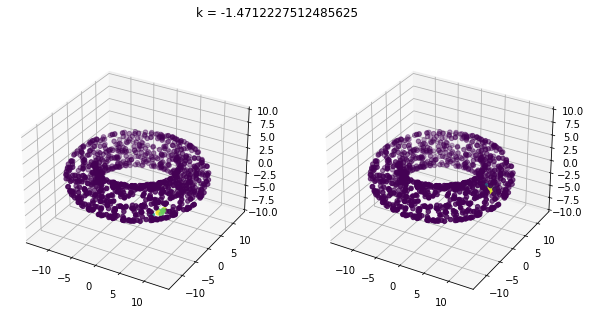

In [111]:
i = 1
j = 5
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

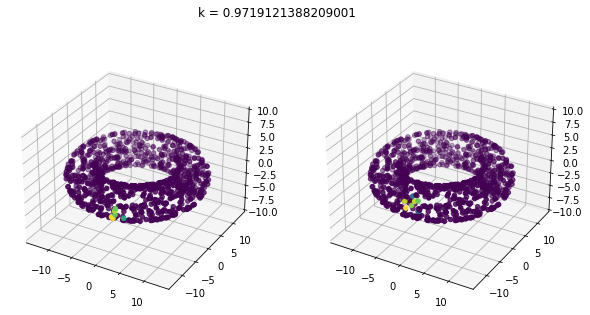

In [58]:
i = 50
diffusion_probs = np.linalg.matrix_power(P,3)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

DEMD is 0.1507733841055613
Diffusion distance is 0.5251079706955154


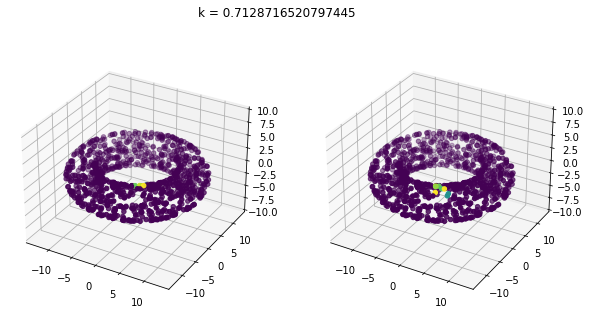

In [112]:
i = 100
diffusion_probs = np.linalg.matrix_power(P,3)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

DEMD is 0.3361279517721994
Diffusion distance is 0.5516488891083691


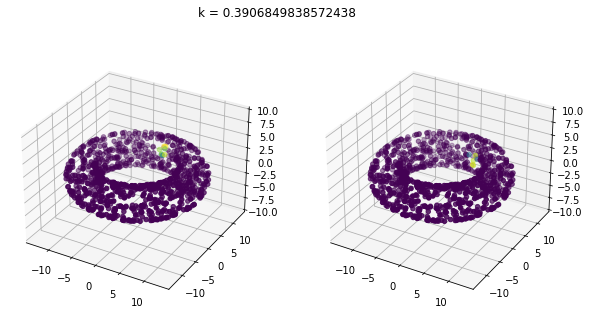

In [116]:
i = 150
diffusion_probs = np.linalg.matrix_power(P,3)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

DEMD is 0.15721990343720046
Diffusion distance is 0.5027292833627448


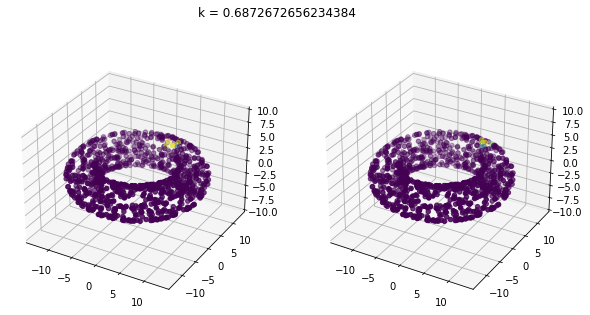

In [117]:
i = 200
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

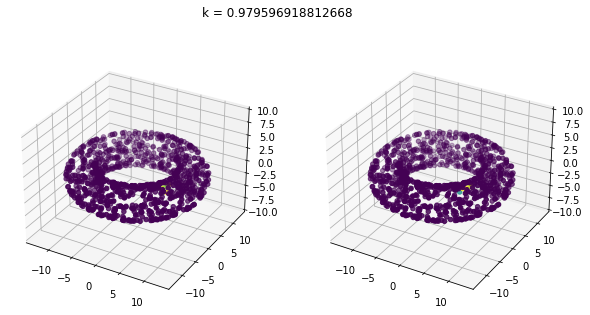

In [68]:
i = 220
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

DEMD is 0.3361049317709882
Diffusion distance is 7.225646727138618


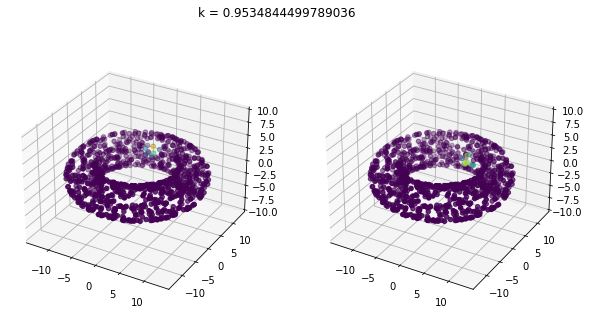

In [70]:
i = 240
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

# Using Regular OT

In [93]:
from pecan.curvature import Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances
ORC_regular = Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances(G,0) # initialize with a graphtools graph of the torus

EMD is 0.5055998010657051
Diffusion distance is 0.5055998010657051


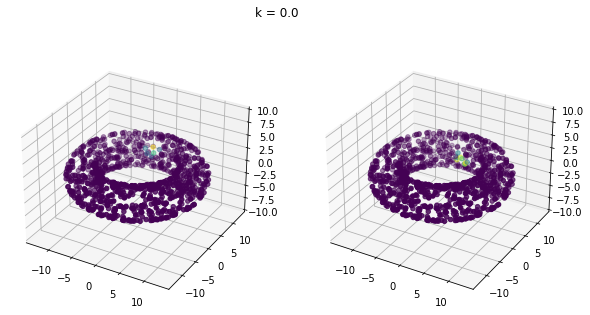

In [94]:
i = 240
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

EMD is 0.4788009896581176
Diffusion distance is 0.4788009896581175


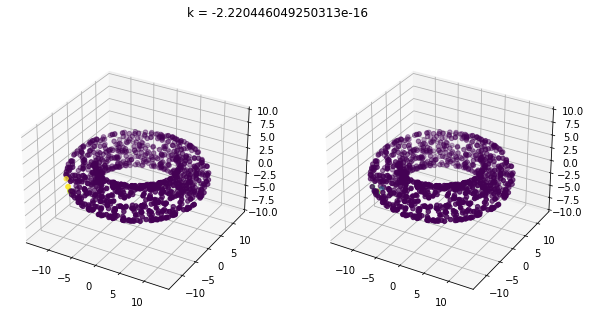

In [97]:
i = 270
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

EMD is 0.5022727033940243
Diffusion distance is 0.5022727033940243


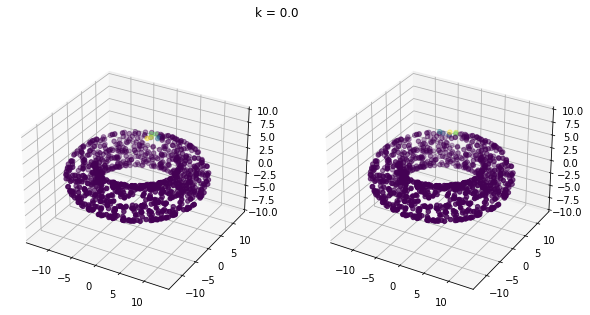

In [100]:
i = 290
diffusion_probs = np.linalg.matrix_power(P,20)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

EMD is 0.5598500626049433
Diffusion distance is 0.5598500626049435


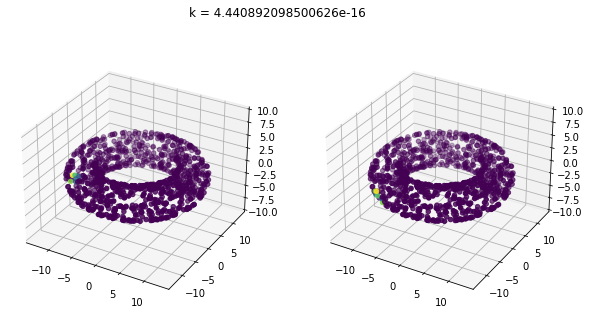

In [108]:
i = 30
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

# Testing with a planar graph


In [ ]:
X = np.mgrid[0:1:0.1, 0:1:0.1].reshape(2,-1).T

In [159]:
GPlanar = graphtools.graphs.kNNGraph(X)
P = GPlanar.P.toarray()

## Using regular OT

In [ ]:
from pecan.curvature import Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances
ORC_regular = Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances(GPlanar,0) # initialize with a graphtools graph of the torus

EMD is 0.5727379931504806
Diffusion distance is 0.5727379931504807


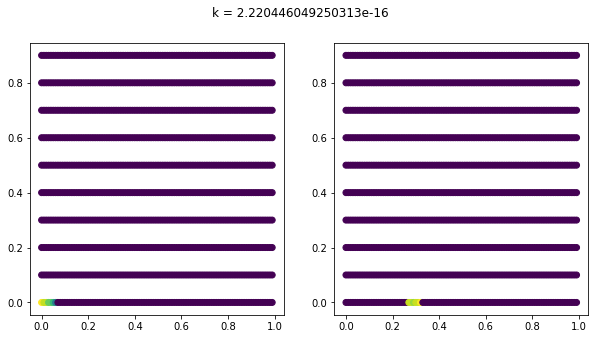

In [157]:
i = 30
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[:,0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[:,1])

EMD is 0.5577005282512267
Diffusion distance is 0.5577005282512268


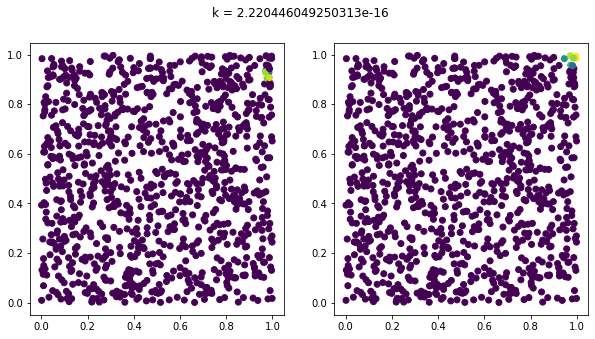

In [135]:
i = 300
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[:,0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[:,1])

## With DEMD

In [136]:
from pecan.curvature import Ollivier_Ricci_Curvature_DEMD
ORC = Ollivier_Ricci_Curvature_DEMD(GPlanar,lp=2) # initialize with a graphtools graph of the torus

DEMD is 1.2350175887631072
Diffusion distance is 0.5443298489673357


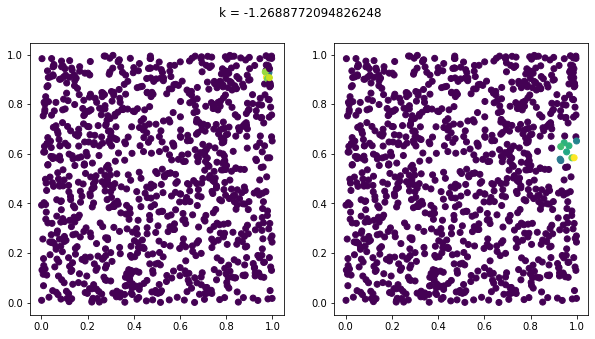

In [137]:
i = 300
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[:,0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[:,1])

DEMD is 0.6939832252620685
Diffusion distance is 0.5570512790031049


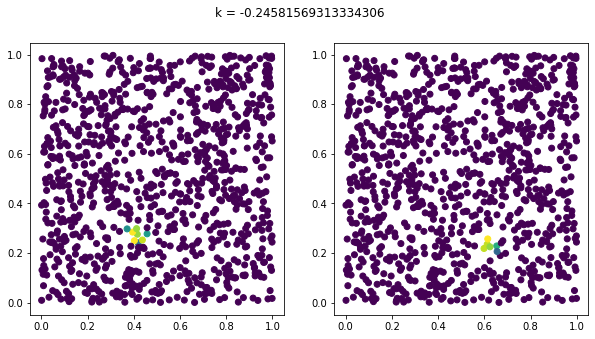

In [138]:
i = 42
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[:,0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[:,1])

DEMD is 1.102128793837382
Diffusion distance is 0.5399734789181727


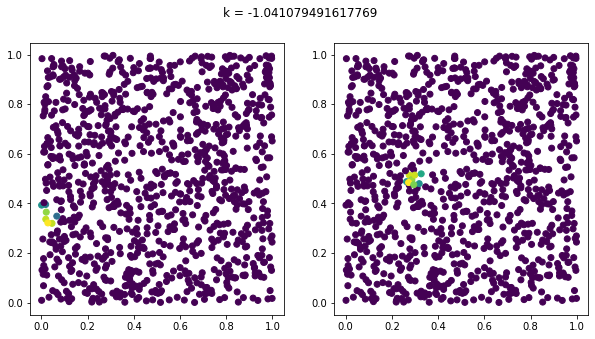

In [139]:
i = 60
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[:,0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[:,1])